In [1]:
print("Hello Julia")

Hello Julia

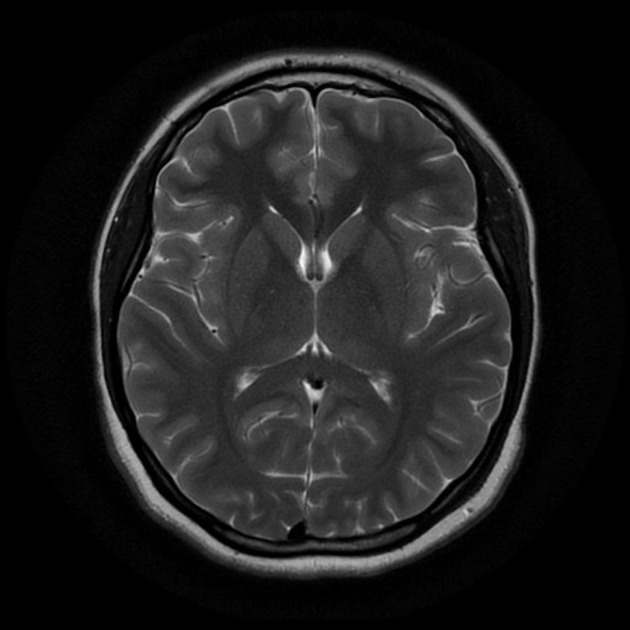

In [13]:
using Images
ImgPath = "/Volumes/GoogleDrive/My Drive/UNOMIC/JuliaTesting/Hands-On-Computer-Vision-with-Julia/Hands-On-Computer-Vision-with-Julia/archive/no/1.jpeg"

if isfile(ImgPath)
    sampleImage = load(ImgPath)
else
    print("ERROR: Image not found")
end



In [14]:
using ImageView

img = load(ImgPath)
imshow(img)

Dict{String, Any} with 4 entries:
  "gui"         => Dict{String, Any}("window"=>GtkWindowLeaf(name="", parent, w…
  "roi"         => Dict{String, Any}("redraw"=>37: "map(clim-mapped image, inpu…
  "annotations" => 3: "input-2" = Dict{UInt64, Any}() Dict{UInt64, Any} 
  "clim"        => 2: "CLim" = CLim{N0f8}(0.0, 0.973) CLim{N0f8} 

In [1]:
using Images, ImageMetadata, TestImages, ImageView

In [3]:
pwd()

"/Volumes/GoogleDrive/My Drive/UNOMIC/JuliaTesting/Julia/Julia"